In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load Mercedes-Benz Residual Value Dataset

In [35]:
import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]

dfs = ['be', 'es', 'fr', 'nl', 'ca']
df_names = ['df_be', 'df_es', 'df_fr', 'df_nl']
vehicle_class = "GLA"

# load data in df/ data cleaning
for i in range (0,len(dfs),1):
    print(i)
    path = "../data/mb/trainingSetDataItems_input_"+dfs[i]+".csv"
    df = pd.read_csv(path, ",", decimal='.')
    # bring rv to the end
    col = df.pop('rv')
    df = df.loc[df['class'] == vehicle_class]
    df.insert(loc= 66 , column= 'rv', value= col)
    df.fillna(0, inplace=True)
    df_names[i] = df[["kw","month_into_model_year","msrp_options","years_into_facelift","act_age_in_years","act_contract_duration_in_month", "act_mileage", "mb_resale_volume", "msrp_full", "years_into_lifecycle", "d_amg", "d_diesel", "d_suv_coupe", "d_amg_entry" ,"rv"]]
    print(df_names[i])

0
       kw  month_into_model_year  msrp_options  years_into_facelift  \
1391   90              22.191781        9850.0             6.512329   
1392   90              20.153425        9850.0             5.071233   
1393   90              10.849315        8100.0             5.482192   
1394   90              17.786301        9850.0             5.654795   
1395   90              13.873973        8100.0             6.230137   
...   ...                    ...           ...                  ...   
2310  155               4.405479        7895.0             5.290411   
2311  280               3.057534       19280.0             1.663014   
2312  280              14.432877       12575.0             2.646575   
2313  280               0.821918       11120.0             6.265753   
2314  280               5.063014       13405.0             6.136986   

      act_age_in_years  act_contract_duration_in_month  act_mileage  \
1391               0.0                       18.871233        11389   
139

In [41]:
import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]

# load marketspecific data

dfs = ['be','es', 'fr', 'nl', 'pt']

df_final = pd.DataFrame()
df_annot = pd.DataFrame()


for i in range (0,5):


    df = pd.read_csv("../data/mb/trainingSetDataItems_input_"+dfs[i]+".csv", ",", decimal='.')
    # bring rv to the end
    col = df.pop('rv')
    df = df.groupby(['class'])['class'].count() 

    df_final [str(dfs[i])] = df 

for i in range (0,5):


    df = pd.read_csv("../data/mb/trainingSetDataItems_input_"+dfs[i]+".csv", ",", decimal='.')
    # bring rv to the end
    col = df.pop('rv')
    df = df.groupby(['class'])['class'].count() 

    df_annot [str(dfs[i])] = df

# create df 

df_final.fillna(0, inplace=True)
df_annot.fillna(0, inplace=True)

df_annot = df_annot.astype(int)
df_annot[df_annot>1400] = " "
df_annot = df_annot.astype(str)

df_final

,be,es,fr,nl,pt
class,,,,,
A,5008,21273,17658.0,2368,5724.0
AMG GT,33,22,5.0,19,16.0
B,3037,11845,9579.0,2063,1875.0
C,8142,9809,12418.0,2465,2751.0
CLA,3162,2542,4275.0,1168,1269.0
CLS,118,97,379.0,64,117.0
E,4188,2288,5964.0,1339,1524.0
EQA,4,12,1.0,18,0.0
EQC,76,28,3.0,41,2.0


<Axes: ylabel='class'>

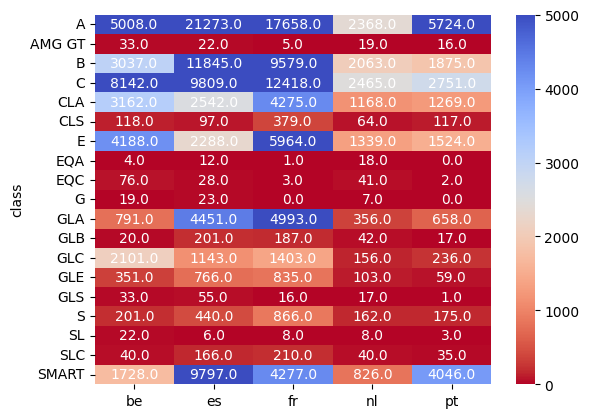

In [44]:
import seaborn as sb

# visualize MB data in heatmap

x = 5000 # critcal value
sb.heatmap(df_final, cmap="coolwarm_r", vmin=0, vmax=x, annot=True,fmt = '',annot_kws={'color':'w'}) 

<Axes: ylabel='class'>

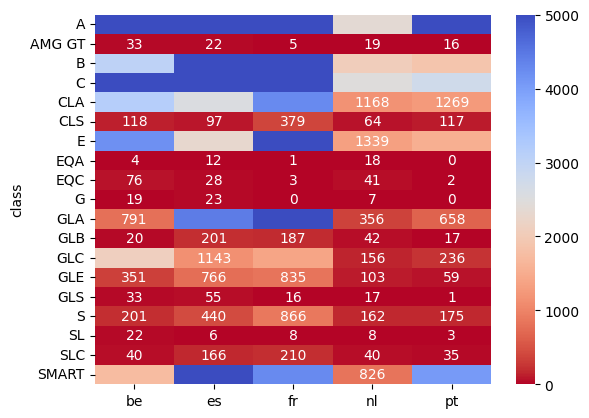

In [42]:
import seaborn as sb

# visualize MB data in heatmap

x = 5000 # critcal value
sb.heatmap(df_final, cmap="coolwarm_r", vmin=0, vmax=x, annot=df_annot,fmt = '',annot_kws={'color':'w'}) # annotate just if amount < x